<a href="https://colab.research.google.com/github/KendallScott/ML2/blob/main/Scott_Kendall_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2

This is called DeathToGridSearch because with this example you will never have to think about how to manage a large number of classifiers etc simultaneously.  You will now be able to run and collect results in a very straightforward manner.  #LongLongLiveGridSearch!

In [6]:
import pandas as pd
import os
import numpy as np
#https://github.com/KendallScott/QTW/blob/main/Case%20Study%204/Case_Study_4.ipynb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from numpy import random
from itertools import product
from sklearn.model_selection import StratifiedKFold, cross_val_predict

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset?resource=download

df = pd.read_csv('/content/drive/MyDrive/Employee.csv', encoding = 'ISO-8859-1',low_memory=False)

Mounted at /content/drive


In [3]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
X = df.loc[:,df.columns != 'LeaveOrNot']
y = df['LeaveOrNot'].values.flatten()

In [7]:
df_num = X.select_dtypes(exclude='object')
num_cols = df_num.columns

# impute numeric with median
for i in num_cols:
    df_num[i] = df_num[i].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))
df_num.info()

df_cat = X.select_dtypes(include='object')
cat_cols = df_cat.columns

# scale numerical data
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

#one hot encode cat data
encoder = OneHotEncoder(sparse_output=False)
df_cat = encoder.fit_transform(df_cat)
X = np.hstack([df_num,df_cat])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   PaymentTier                4653 non-null   int64
 2   Age                        4653 non-null   int64
 3   ExperienceInCurrentDomain  4653 non-null   int64
dtypes: int64(4)
memory usage: 145.5 KB


In [8]:
education = df[['Education', 'LeaveOrNot','City']].groupby(['Education', 'LeaveOrNot']).count().reset_index()

In [9]:
education

,Education,LeaveOrNot,City
0,Bachelors,0,2472
1,Bachelors,1,1129
2,Masters,0,447
3,Masters,1,426
4,PHD,0,134
5,PHD,1,45


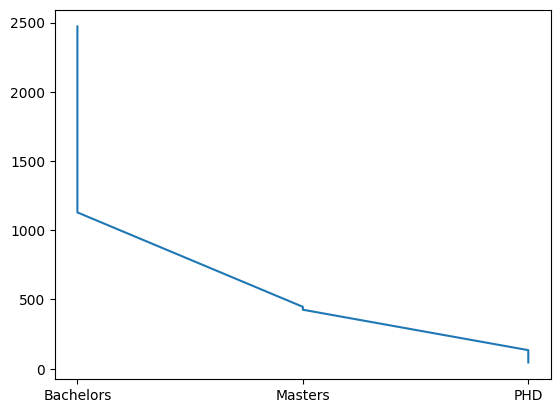

In [10]:
# prompt: create graph of data df using index for date and close on line plot

import matplotlib.pyplot as plt

plt.plot(education['Education'], education['City'], label='LeaveOrNot')

In [336]:
grid

[{'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 0.1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 0.1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 3,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 3,
  'alpha': 0.1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 3,
  'alpha': 1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 1,
  'lambda': 1,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,


In [338]:
grid

[{'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 0.1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 0.1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 3,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 3,
  'alpha': 0.1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 3,
  'alpha': 1},
 {'objective': 'b',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 1,
  'lambda': 1,
  'alpha': 0},
 {'objective': 'b',
  'eta': 0.1,


In [343]:
grid

[{'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 0},
 {'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 0.1},
 {'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 1,
  'alpha': 1},
 {'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 0},
 {'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 0.1},
 {'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 2,
  'alpha': 1},
 {'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'eta': 0.1,
  'max_depth': 3,
  'gamma': 0,
  'lambda': 3,
  'alpha': 0},
 {'objective': 'binary:logistic',
  'eval_metric': 'auc',


In [345]:
objective = ['binary:logistic']
eval_metric = ['auc']
learning_rates = [0.1, 0.2]
max_depths = [3, 5,7, 10, 20]
gamma = [0,1,3]
lambda_ls = [1,2,3]
alpha = [0,0.1,1]

hyper_dict = {'objective': objective, 'eval_metric': eval_metric, 'eta': learning_rates, 'max_depth': max_depths, 'gamma': gamma, 'lambda': lambda_ls, 'alpha': alpha}
grid = makeGrid(hyper_dict)


skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(X,y)

for ids, (train_index, test_index) in enumerate(skf.split(X, y)):
 dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
 dtest = xgb.DMatrix(X[test_index], label=y[test_index])
 evallist = [(dtrain, 'train'), (dtest, 'eval')]

 score = xgb.cv(params=grid[0], num_boost_round=20, dtrain=dtrain,  nfold=5, stratified=True, early_stopping_rounds=3, verbose_eval=1)
 index=score.shape[0]-1
 score=score.iloc[index,2]


[0]	train-auc:0.79085+0.00185	test-auc:0.78766+0.00957
[1]	train-auc:0.79327+0.00332	test-auc:0.79133+0.00867
[2]	train-auc:0.79570+0.00369	test-auc:0.79318+0.00897
[3]	train-auc:0.80400+0.01742	test-auc:0.79843+0.00673
[4]	train-auc:0.81908+0.02036	test-auc:0.81158+0.01103
[5]	train-auc:0.83307+0.00677	test-auc:0.83064+0.01447
[6]	train-auc:0.83555+0.00681	test-auc:0.83388+0.01478
[7]	train-auc:0.83803+0.00678	test-auc:0.83603+0.01504
[8]	train-auc:0.83987+0.00548	test-auc:0.83815+0.01619
[9]	train-auc:0.84103+0.00560	test-auc:0.83957+0.01574
[10]	train-auc:0.84251+0.00503	test-auc:0.84136+0.01625
[11]	train-auc:0.84242+0.00521	test-auc:0.84135+0.01612
[12]	train-auc:0.84335+0.00454	test-auc:0.84267+0.01687
[13]	train-auc:0.84336+0.00453	test-auc:0.84273+0.01694
[14]	train-auc:0.84344+0.00460	test-auc:0.84281+0.01693
[15]	train-auc:0.84378+0.00441	test-auc:0.84321+0.01727
[16]	train-auc:0.84383+0.00441	test-auc:0.84315+0.01772
[17]	train-auc:0.84531+0.00484	test-auc:0.84359+0.01695
[1

In [361]:
import itertools
from itertools import *
from numpy import arange
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb

#reference: https://stackoverflow.com/questions/69300562/how-to-define-the-grid-for-using-grid-search-from-scratch-in-python


def makeGrid(pars_dict):
    keys=pars_dict.keys()
    length = len(keys)
    combinations=itertools.product(*pars_dict.values())
    ds=[dict(zip(keys,cc)) for cc in combinations]
    return ds


grid_results = np.empty(0)
model_selection_results = []

def search_results(model, grid):
  for x, i in enumerate(grid):
    if model=='XGBClassifier':
      skf = StratifiedKFold(n_splits=5, shuffle=True)
      skf.get_n_splits(X,y)

      for ids, (train_index, test_index) in enumerate(skf.split(X, y)):
        dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
        dtest = xgb.DMatrix(X[test_index], label=y[test_index])
        evallist = [(dtrain, 'train'), (dtest, 'eval')]

        score = xgb.cv(params=i, num_boost_round=20, dtrain=dtrain,  nfold=5, stratified=True, early_stopping_rounds=3, verbose_eval=1)
        index=score.shape[0]-1
        score=score.iloc[index,2]
        grid_results_updated = np.insert(grid_results,[0], score)

        if score< 1:
          best_result = score
          best_model = i

          if score> best_result:
              best_result = best_result
              best_model = i
              return best_model
              return best_result

    else:
        model.set_params(**i)
        model.fit(X,y)
        score = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
        score=score.mean()
        score=np.ravel(score)
        grid_results_updated = np.insert(grid_results,[0], score)
        return (i, score.mean())
        return grid_results_updated
        print (grid_results_updated)
        if max(grid_results) == score.mean():
            print('best model & params: ', model)
            best_model = model
            return best_model
            return grid_results_updated


In [ ]:
from xgboost import XGBClassifier

model_selection = ['LogisticRegression', 'RandomForest', 'LinearSVC', 'XGBoost']
#creating different params for different models in loop
for x,i in enumerate(model_selection):
    print(i)
    if i=='LogisticRegression':
      model=LogisticRegression(random_state=45,penalty='elasticnet',class_weight='balanced',solver='saga')
      l1 = arange(0, 1, 0.1)
      C = [  0.001,  0.1,  0.5, 1]
      max_iter = [25,  50, 60, 75, 100]

      hyper_dict = {'C': C, 'l1_ratio': l1, 'max_iter':max_iter}
      grid = makeGrid(hyper_dict)

      search_results(model, grid)
      model_selection_results.append(search_results(model, grid))

    if i=='RandomForest':
      model = RandomForestClassifier(criterion='gini',class_weight='balanced')
      n_estimators = [50, 100, 200]
      max_features = ['sqrt','log2',20]

      hyper_dict = {'n_estimators': n_estimators, 'max_features': max_features}
      grid = makeGrid(hyper_dict)

      search_results(model, grid)
      model_selection_results.append(search_results(model, grid))

    if i=='LinearSVC':
      model = LinearSVC(max_iter=100000,tol=0.01,random_state=709,dual=True,class_weight = 'balanced')
      C = [.001,.005,.01,.05,.1,.2,.5,.8,1,3,5,10,20,50,100,500,1000,5000,10000,100000]

      hyper_dict = {'C': C}
      grid = makeGrid(hyper_dict)

      search_results(model, grid)
      model_selection_results.append(search_results(model, grid))

    if i=='XGBoost':
      objective = ['binary:logistic']
      eval_metric = ['auc']
      learning_rates = [0.1, 0.2]
      max_depths = [3, 5,7, 10, 20]
      gamma = [0,1,3]
      lambda_ls = [1,2,3]
      alpha = [0,0.1,1]

      hyper_dict = {'objective': objective, 'eval_metric': eval_metric, 'eta': learning_rates, 'max_depth': max_depths, 'gamma': gamma, 'lambda': lambda_ls, 'alpha': alpha}
      grid = makeGrid(hyper_dict)

      model = 'XGBClassifier'
      search_results(model, grid)
      model_selection_results.append(search_results(model, grid))


LogisticRegression
RandomForest
LinearSVC
XGBoost
[0]	train-auc:0.79626+0.00285	test-auc:0.79606+0.01124
[1]	train-auc:0.79709+0.00359	test-auc:0.79613+0.01113
[2]	train-auc:0.79926+0.00397	test-auc:0.79884+0.01051
[3]	train-auc:0.80006+0.00289	test-auc:0.79951+0.01134
[4]	train-auc:0.80778+0.01184	test-auc:0.80347+0.01507
[5]	train-auc:0.81366+0.01688	test-auc:0.81001+0.01275
[6]	train-auc:0.82543+0.01224	test-auc:0.82259+0.01264
[7]	train-auc:0.83220+0.00530	test-auc:0.83011+0.00859
[8]	train-auc:0.83324+0.00441	test-auc:0.83150+0.00858
[9]	train-auc:0.83538+0.00469	test-auc:0.83451+0.00873
[10]	train-auc:0.83668+0.00402	test-auc:0.83590+0.00973
[11]	train-auc:0.83759+0.00383	test-auc:0.83647+0.00906
[12]	train-auc:0.83792+0.00378	test-auc:0.83667+0.00929
[13]	train-auc:0.83833+0.00352	test-auc:0.83699+0.00943
[14]	train-auc:0.83942+0.00333	test-auc:0.83827+0.00931
[15]	train-auc:0.83958+0.00323	test-auc:0.83861+0.00990
[16]	train-auc:0.84033+0.00329	test-auc:0.83939+0.00969
[17]	tra

In [ ]:
for i,x in enumerate(model_selection):
  print(model_selection[i], ': ', model_selection_results[i])

In [ ]:
# Homework 2
import numpy as np
from sklearn.metrics import accuracy_score # other metrics too pls!
from sklearn.ensemble import RandomForestClassifier # more!
from sklearn.model_selection import KFold

# adapt this code below to run your analysis
# 1. Write a function to take a list or dictionary of clfs and hypers(i.e. use logistic regression), each with 3 different sets of hyper parameters for each
# 2. Expand to include larger number of classifiers and hyperparameter settings
# 3. Find some simple data
# 4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings
# 5. Please set up your code to be run and save the results to the directory that its executed from
# 6. Investigate grid search function

M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
L = np.ones(M.shape[0])
n_folds = 5

data = (M, L, n_folds)

def run (a_clf, data, clf_hyper={}):
  M, L, n_folds = data # unpack data container
  kf = KFold(n_splits=n_folds) # Establish the cross validation
  ret = {} # classic explication of results

  for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
    clf = a_clf(**clf_hyper) # unpack parameters into clf if they exist
    clf.fit(M[train_index], L[train_index])
    pred = clf.predict(M[test_index])
    ret[ids]= {'clf': clf,
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}
  return ret



In [ ]:
results = run (RandomForestClassifier, data, clf_hyper={})

In [ ]:
results